Sean Kelly
11/2/20
HW 15

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [2]:
#Creates database with shuffled color codes
from numpy import random
database = [0,1,2,3]
random.shuffle(database)
print("Database:", database)

#Identifies target color code
target_color_code = 1
print("Target Color: ", target_color_code)

#Classical solution to identifying index of color code in database
for idx in range(len(database)):
    if target_color_code == database[idx]:
        print("Solution Index: ",idx)

Database: [1, 3, 0, 2]
Target Color:  1
Solution Index:  0


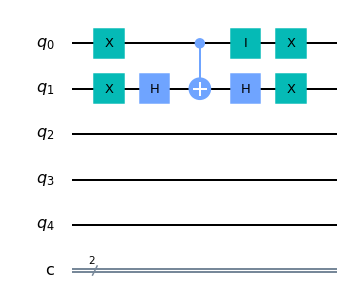

In [3]:
"""Phase Circuit"""

phase = QuantumCircuit(5,2)
phase.x(0)
phase.x(1)
phase.h(1)
phase.cx(0,1)
phase.i(0)
phase.h(1)
phase.x(0)
phase.x(1)

phase.draw('mpl')

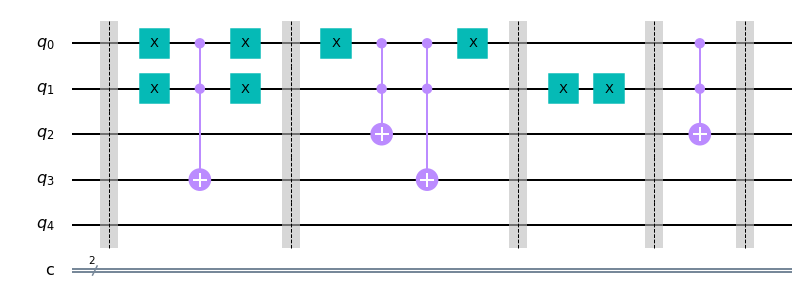

In [4]:
"""Database Circuit"""

db_circ = QuantumCircuit(5,2)

db_circ.barrier()

for index in range(len(database)):
    
    #Flips index qubit states to perform correct opened/closed circle ccx() gates
    if index == 0: 
        db_circ.x(0)
        db_circ.x(1)
    elif index == 1: 
        db_circ.x(0)
    elif index == 2: 
        db_circ.x(1)
    
    #Loads classical database into database qubits
    if database[index] == 0: #Blue
        pass
    elif database[index] == 1: #Green
        db_circ.ccx(0,1,3)
    elif database[index] == 2: #Orange
        db_circ.ccx(0,1,2)
    elif database[index] == 3: #Red
        db_circ.ccx(0,1,2)
        db_circ.ccx(0,1,3)
        
    #Flips index qubit states back to proper state from before ccx() gates
    if index == 0: 
        db_circ.x(0)
        db_circ.x(1)
    elif index == 1: 
        db_circ.x(0)
    elif index == 2: 
        db_circ.x(1)
        
    db_circ.barrier()
        
db_circ.draw('mpl')

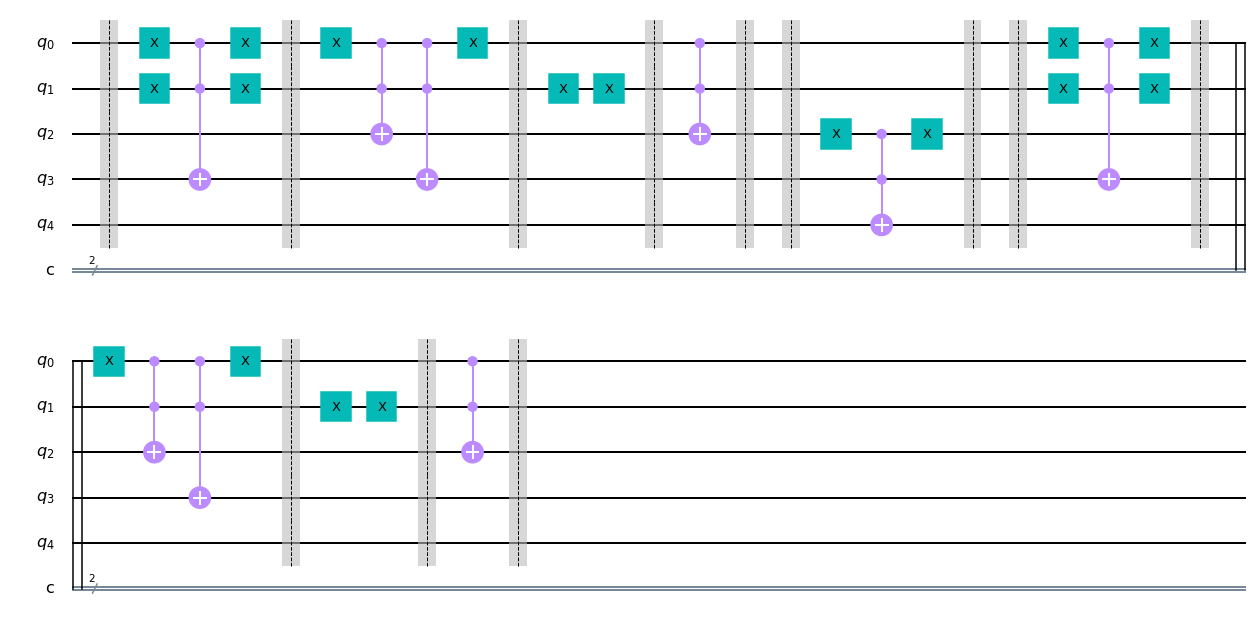

In [5]:
"""Oracle Circuit"""

oracle = QuantumCircuit(5,2)
oracle = oracle + db_circ
oracle.barrier()

#Flips index qubit states to perform correct opened/closed circle ccx() gate
if target_color_code == 0:
    oracle.x(2)
    oracle.x(3)
elif target_color_code == 1:
    oracle.x(2)
elif target_color_code == 2:
    oracle.x(3)

oracle.ccx(2,3,4) #Apply ccx gate on work qubit

#Flips index qubit states back to proper state from before ccx() gates
if target_color_code == 0:
    oracle.x(2)
    oracle.x(3)
elif target_color_code == 1:
    oracle.x(2)
elif target_color_code == 2:
    oracle.x(3)
    
oracle.barrier()
oracle = oracle + db_circ

oracle.draw('mpl')

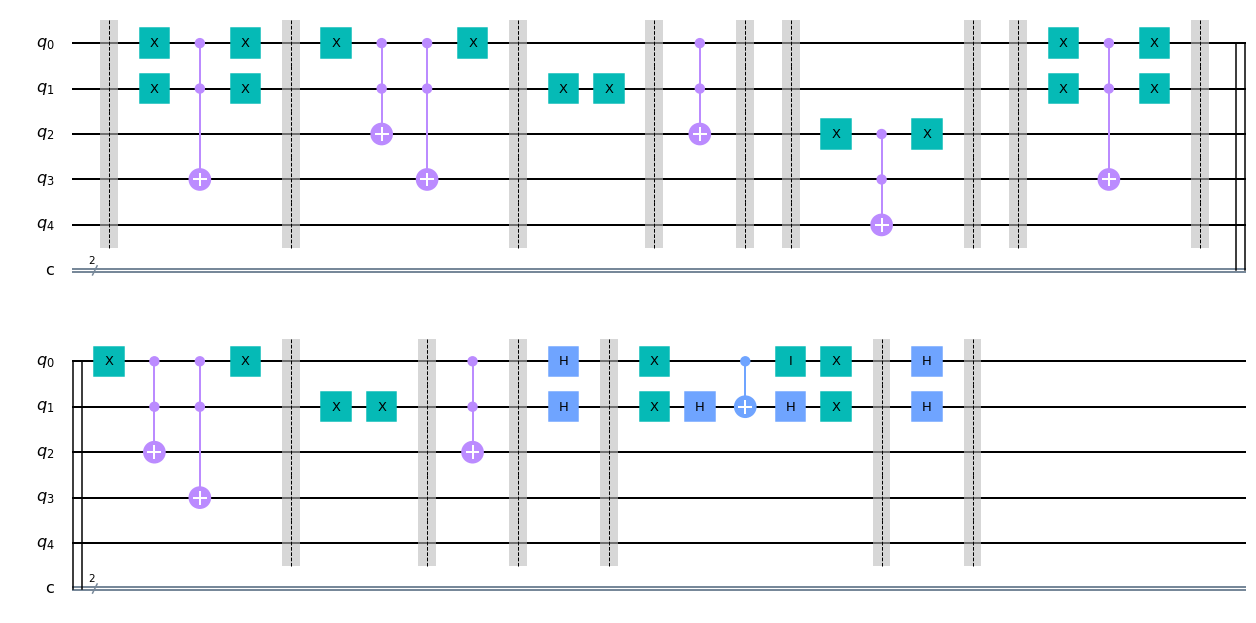

In [6]:
"""Grover Circuit"""

grover = QuantumCircuit(5,2)
grover = grover + oracle

grover.h(0)
grover.h(1)
grover.barrier()

grover = grover + phase

grover.barrier()
grover.h(0)
grover.h(1)
grover.barrier()

grover.draw('mpl')

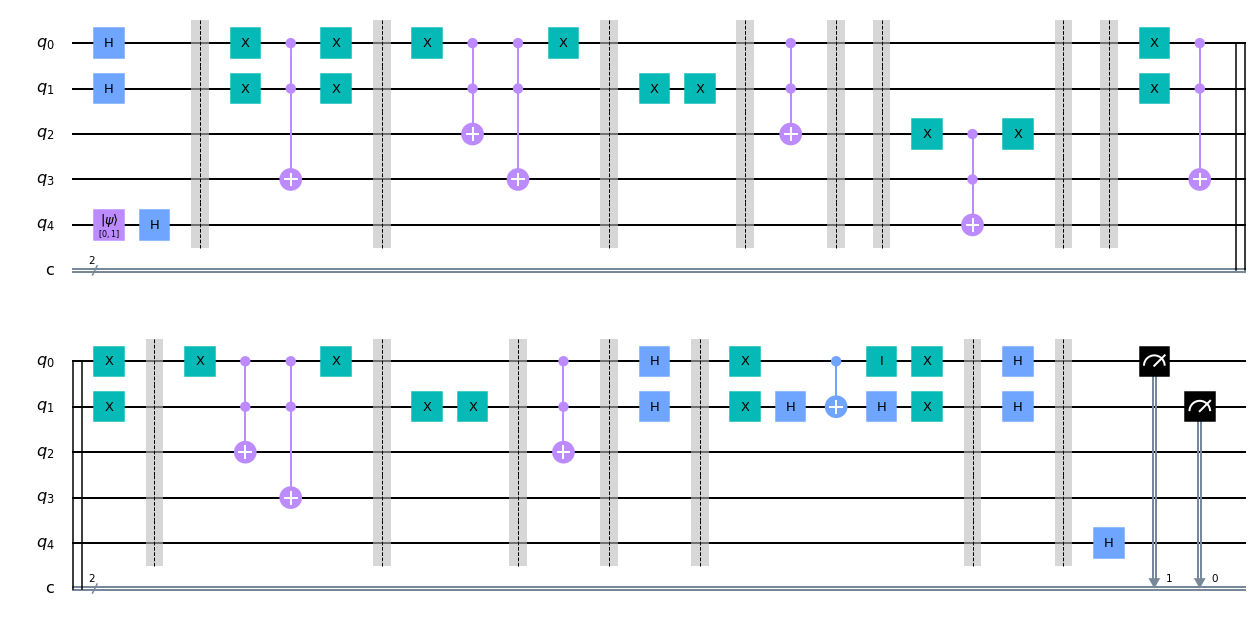

In [7]:
"""Grover Iteration"""

circ = QuantumCircuit(5,2)

circ.initialize([0,1],4) #initializes work qubit to the 1 state

circ.h(0)
circ.h(1)
circ.h(4)

circ = circ + grover

circ.h(4) #Reset work qubit

#Measure first 2 qubits
circ.measure(0,1)
circ.measure(1,0)

circ.draw('mpl')

{'00': 1000}


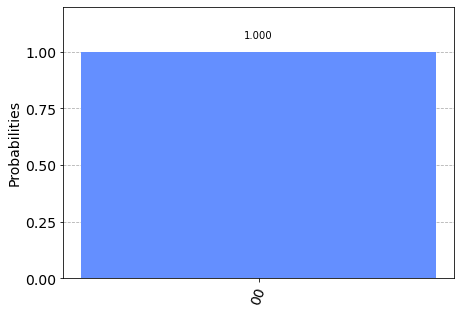

In [8]:
sim = Aer.get_backend('qasm_simulator')
res = execute(circ, sim, shots = 1000).result()
print(res.get_counts())
plot_histogram(res.get_counts())